Iantsa Provost et Bastien Soucasse – Groupe 5

# Projet d’ACID – 2 janvier 2022

[Sujet](https://masterinfo.emi.u-bordeaux.fr/wiki/lib/exe/fetch.php?media=mini_projet.pdf)

Commençons par importer les modules nécessaires au bon fonctionnement du projet.

In [1]:
from tensorflow.keras import utils
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

On déclare d’abord quelques constantes importantes.

In [2]:
NUM_CLASSES = 10
VERBOSE = True

On peut alors créer nos données à l’aide de **keras**.

x_train.shape = (60000, 28, 28)
y_train.shape = (60000, 10)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000, 10)
x_train[0]:


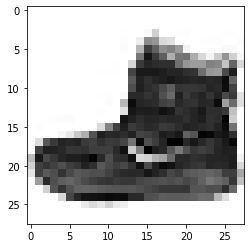

y_train[0] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = utils.to_categorical(y_train, NUM_CLASSES), utils.to_categorical(y_test, NUM_CLASSES)

if (VERBOSE):
    print('x_train.shape =', x_train.shape)
    print('y_train.shape =', y_train.shape)
    print('x_test.shape =', x_test.shape)
    print('y_test.shape =', y_test.shape)
    print('x_train[0]:')
    plt.imshow(x_train[0], cmap = cm.Greys)
    plt.show()
    print('y_train[0] =', y_train[0])